# Sistem Prediksi Tingkat Resiko Kredit Untuk Kelayakan Pemberian Kredit
- dataset yang digunakan adalah data berasal dari OpenData Kaggle - https://www.kaggle.com/datasets/laotse/credit-risk-dataset
- Dataset terdiri dari beberapa kolom, yang masing-masing berisi informasi penting tentang pemohon dan status pinjaman mereka.
- Dataset ini digunakan untuk menganalisis dan memprediksi tingkat risiko kredit berdasarkan dari data historis pemohon pinjaman. Ini membantu dalam pengambilan keputusan oleh pemberi pinjaman untuk menentukan apakah pemohon layak mendapatkan pinjaman atau tidak.
- Dataset ini dapat digunakan untuk analisis deskriptif untuk memahami karakteristik pemohon pinjaman yang baik dan yang buruk.
- melakukan analisis berapa banyak pemohon yang memiliki status pinjaman yang lancar dengan pemohon yang berstatus pinjaman macet (yang gagal bayar).
- Analisis yang mendalam dapat membantu lembaga keuangan dalam merancang produk pinjaman yang lebih baik, memahami profil risiko nasabah, dan mengoptimalkan keputusan pemberian pinjaman dengan melihat tingkat resiko kredit.

In [1]:
import pandas as pd # library untuk pengolahan dataset
import numpy as np # library untuk pengolahan dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
x=pd.read_csv('./simpandata/credit_risk.csv')
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Data set ini memiliki dimensi data sebesar 32581 baris data dengan 12 kolom, yang terdiri dari kolom
Berikut adalah perbaikan informasi yang Anda berikan, dengan penjelasan lebih detail untuk setiap kolom:

1. **person_age (Usia Pemohon)**  
   Memiliki **32,581** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan usia dari pemohon pinjaman.

2. **person_income (Pendapatan Pemohon)**  
   Memiliki **32,581** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan pendapatan tahunan pemohon.

3. **person_home_ownership (Status Kepemilikan Rumah)**  
   Memiliki **32,581** baris data dengan tipe data **object** (kategorikal).  
   Menunjukkan status kepemilikan rumah pemohon (misalnya, memiliki, menyewa, atau gratis).

4. **person_emp_length (Lama Bekerja Pemohon)**  
   Memiliki **31,686** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan lama pemohon bekerja dalam tahun, dengan data yang hilang untuk beberapa pemohon.

5. **loan_intent (Tujuan Pinjaman)**  
   Memiliki **32,581** baris data dengan tipe data **object** (kategorikal).  
   Menunjukkan tujuan dari pinjaman (seperti pembiayaan pendidikan, membeli rumah, dsb.).

6. **loan_grade (Kelas Pinjaman)**  
   Memiliki **32,581** baris data dengan tipe data **object** (kategorikal).  
   Menunjukkan peringkat atau kelas dari pinjaman berdasarkan risiko.

7. **loan_amnt (Jumlah Pinjaman)**  
   Memiliki **32,581** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan jumlah yang diminta oleh pemohon dalam pinjaman.

8. **loan_int_rate (Tingkat Bunga Pinjaman)**  
   Memiliki **29,465** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan tingkat bunga tahunan untuk pinjaman, dengan data yang hilang untuk beberapa pinjaman.

9. **loan_status (Status Pinjaman)**  
   Memiliki **32,581** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan status pinjaman (0=dilunasi(kredit lancar) dan 1=gagal bayar(kredit macet)).

10. **loan_percent_income (Persentase Pendapatan terhadap Pinjaman)**  
    Memiliki **32,581** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan persentase pendapatan pemohon yang digunakan untuk membayar pinjaman.

11. **cb_person_default_on_file (Riwayat Default Pemohon)**  
    Memiliki **32,581** baris data dengan tipe data **object** (kategorikal).  
    Menunjukkan apakah pemohon memiliki riwayat gagal bayar atau default dalam catatan lembaga keuangan.

12. **cb_person_cred_hist_length (Lama Riwayat Kredit Pemohon)**  
    Memiliki **32,581** baris data dengan tipe data **int64** (numerik).  
    Menunjukkan lama riwayat kredit pemohon dalam bulan.  

# STATISTIK DATASET RESIKO KREDIT

In [4]:
x.describe().round()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,28.0,66075.0,5.0,9589.0,11.0,0.0,0.0,6.0
std,6.0,61983.0,4.0,6322.0,3.0,0.0,0.0,4.0
min,20.0,4000.0,0.0,500.0,5.0,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,8.0,0.0,0.0,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.0,4.0
75%,30.0,79200.0,7.0,12200.0,13.0,0.0,0.0,8.0
max,144.0,6000000.0,123.0,35000.0,23.0,1.0,1.0,30.0


# OUTPUT/CLASS DARI SISTEM PREDIKSI ADALAH LOAN STATUS (STATUS PINJAMAN
## loan_status (Status Pinjaman)
- Memiliki 32,581 baris data dengan tipe data int64 (numerik).
- Menunjukkan status pinjaman (0=dilunasi(kredit lancar) dan 1=gagal bayar(kredit lancar)).

In [5]:
print(x['loan_status'].nunique())
x['loan_status'].unique()

2


array([1, 0], dtype=int64)

In [6]:
count_loan_status_1 = x[x['loan_status'] == 1].shape[0]  
print(count_loan_status_1)

7108


In [7]:
x[x['loan_status'] < 1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## kolom loan_status (Status Pinjaman)
- Memiliki 2 kategori nilai data, yaitu:
1. nilai 0 (dilunasi) sebanyak 25473 data
2. nilai 1 (gagal bayar) sebanyak 7108 baris data

## FEATURE/INPUT SISTEM PREDIKSI INI ADALAH
1. **person_age (Usia Pemohon)**  
2. **person_income (Pendapatan Pemohon)**  
3. **person_home_ownership (Status Kepemilikan Rumah)**  
4. **person_emp_length (Lama Bekerja Pemohon)**  
5. **loan_intent (Tujuan Pinjaman)**  
6. **loan_grade (Kelas Pinjaman)**  
7. **loan_amnt (Jumlah Pinjaman)**  
8. **loan_int_rate (Tingkat Bunga Pinjaman)**    
9. **loan_percent_income (Persentase Pendapatan terhadap Pinjaman)**  
10. **cb_person_default_on_file (Riwayat Default Pemohon)** 
11. **cb_person_cred_hist_length (Lama Riwayat Kredit Pemohon)**  

# 1. person_age (Usia Pemohon)
- Memiliki 32,581 baris data dengan tipe data int64 (numerik).
- Menunjukkan usia dari pemohon pinjaman.
## Lakukan analisa terkait dengan nilai minimal/maksimal, berapa banyak kelompok/kategori data (data unik) sertakan indikasi kemungkinan nilai outlier pada kolom ini

In [8]:
x['person_age'].describe().round()

count    32581.0
mean        28.0
std          6.0
min         20.0
25%         23.0
50%         26.0
75%         30.0
max        144.0
Name: person_age, dtype: float64

### Nilai minimal usia peminjam adalah 20 th, nilai maksimal 144 th (besar kemungkinan data outlier)

In [9]:
print(x['person_age'] .nunique())
x['person_age'].unique()

58


array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

### Dari total 32,581 baris data, Terdapat sebanyak 58 kelompok/kategori data usia peminjam mulai dari 20 tahun sampai 144 tahun

In [10]:
x[x['person_age'] > 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32557,69,24000,RENT,3.0,MEDICAL,A,6000,6.62,0,0.25,N,23
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,N,21
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


### Terdapat 70 baris data usia peminjam di atas 60 tahun (Indikasi Data Outlier)

# 2. person_income (PENDAPATAN PEMOHON)
- Memiliki 32,581 baris data dengan tipe data int64 (numerik).
- Menunjukkan pendapatan dari pemohon pinjaman.
## Lakukan analisa terkait dengan nilai minimal/maksimal, berapa banyak kelompok/kategori data (data unik) sertakan indikasi kemungkinan nilai outlier pada kolom ini

In [11]:
x['person_income'].describe().round()

count      32581.0
mean       66075.0
std        61983.0
min         4000.0
25%        38500.0
50%        55000.0
75%        79200.0
max      6000000.0
Name: person_income, dtype: float64

### Nilai minimal pendapatan peminjam adalah 4000 USD, nilai maksimal 6.000.000 USD

In [12]:
print(x['person_income'].nunique())
x['person_income'].unique()

4295


array([  59000,    9600,   65500, ...,  720000, 1900000,    4888],
      dtype=int64)

### Dari total 32,581 baris data, Terdapat sebanyak 4295 kelompok/kategori data pendapatan pemohon/peminjam

In [13]:
# Menghitung frekuensi kemunculan  
frekuensi = x['person_income'].value_counts()  

# Menampilkan 10 terbanyak  
frekuensi_terbanyak = frekuensi.head(10)  
print(frekuensi_terbanyak)

60000    1046
30000     847
50000     778
40000     658
45000     590
75000     579
48000     532
65000     532
70000     527
42000     524
Name: person_income, dtype: int64


In [14]:
# Menghitung frekuensi kemunculan  
frekuensi = x['person_income'].value_counts()  

# Menampilkan 10 terendah  
frekuensi_terendah = frekuensi.nsmallest(10)  
print(frekuensi_terendah)

47652    1
55920    1
38688    1
33864    1
50820    1
63552    1
20244    1
98500    1
61628    1
30016    1
Name: person_income, dtype: int64


### Dengan frekuensi kemunculan paling banyak person income adalah 60.000 USD, yaitu sebanyak 1046 baris data|

# 3. person_home_ownership (Status Kepemilikan Rumah)
Memiliki 32,581 baris data dengan tipe data object (kategorikal).
Menunjukkan status kepemilikan rumah pemohon (misalnya, memiliki, menyewa, atau gratis).


# 4. person_emp_length (Lama Bekerja Pemohon)
Memiliki 31,686 baris data dengan tipe data float64 (numerik).
Menunjukkan lama pemohon bekerja dalam tahun, dengan data yang hilang untuk beberapa pemohon.

In [15]:
x['person_emp_length'].describe().round()

count    31686.0
mean         5.0
std          4.0
min          0.0
25%          2.0
50%          4.0
75%          7.0
max        123.0
Name: person_emp_length, dtype: float64

In [16]:
print(x['person_emp_length'].nunique())
x['person_emp_length'].unique()

36


array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [17]:
# Menghitung frekuensi kemunculan  
frekuensi = x['person_emp_length'].value_counts()  

# Menampilkan 10 terbanyak  
frekuensi_terbanyak = frekuensi.head(10)  
print(frekuensi_terbanyak)

0.0    4105
2.0    3849
3.0    3456
5.0    2946
1.0    2915
4.0    2874
6.0    2666
7.0    2196
8.0    1687
9.0    1367
Name: person_emp_length, dtype: int64


In [18]:
x[x['person_emp_length'] > 35]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


# terdapat indikasi nilai outlier, karena lama bekerja diatas 35 tahun sebanyak 4 baris data

# 5.loan_intent (Tujuan Pinjaman)
- Memiliki 32,581 baris data dengan tipe data object (kategorikal).
- Menunjukkan tujuan dari pinjaman (seperti pembiayaan pendidikan, membeli rumah, dsb.)

In [19]:
print(x['loan_intent'].nunique())
x['loan_intent'].unique()

6


array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [20]:
x['loan_intent'].describe()

count         32581
unique            6
top       EDUCATION
freq           6453
Name: loan_intent, dtype: object

### Terdapat 7 kategori tujuan peminjaman yaitu PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, & DEBTCONSOLIDATION, dengan frekuensi kemunculan terbanyak adalah tujuan EDUCATION(pendidikan) dengan 6453 baris data

# 6. loan_grade (Kelas Pinjaman)
- Memiliki 32,581 baris data dengan tipe data object (kategorikal).
- Menunjukkan peringkat atau kelas dari pinjaman berdasarkan risiko.

In [21]:
print(x['loan_grade'].nunique())
x['loan_grade'].unique()

7


array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [22]:
x['loan_grade'].describe()

count     32581
unique        7
top           A
freq      10777
Name: loan_grade, dtype: object

### Terdapat 7 kategori kelas peminjam yaitu kelas A,B,C,D,E,F & kelas G, dengan frekuensi kemunculan terbanyak adalah kelas A dengan 10777 baris data

# 7. loan_amnt (Jumlah Pinjaman)
Memiliki 32,581 baris data dengan tipe data int64 (numerik).
Menunjukkan jumlah yang diminta oleh pemohon dalam pinjaman.

# 8.loan_int_rate (Tingkat Bunga Pinjaman)
Memiliki 29,465 baris data dengan tipe data float64 (numerik).
Menunjukkan tingkat bunga tahunan untuk pinjaman, dengan data yang hilang untuk beberapa pinjaman.

# 9. loan_percent_income (Persentase Pendapatan terhadap Pinjaman)
Memiliki 32,581 baris data dengan tipe data float64 (numerik).
Menunjukkan persentase pendapatan pemohon yang digunakan untuk membayar pinjaman.

# 10. cb_person_default_on_file (Riwayat Default Pemohon)
Memiliki 32,581 baris data dengan tipe data object (kategorikal).
Menunjukkan apakah pemohon memiliki riwayat gagal bayar atau default dalam catatan lembaga keuangan.

# 11.cb_person_cred_hist_length (Lama Riwayat Kredit Pemohon)
Memiliki 32,581 baris data dengan tipe data int64 (numerik).
Menunjukkan lama riwayat kredit pemohon dalam bulan.

# PRE PROSESSING
## DATA CLEANING

# CEK MISSING VALUE

In [23]:
# melakukan pengecekan nilai missing value
pd.isna(x).sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## TERDAPAT NILAI MISSING VALUE PADA KOLOM/FEATURE
1. person_emp_length sebanyak 895 baris data
2. loan_int_rate sebanyak 3116 baris data

# Menangani Missing Value
1. person_emp_length Missing Value dihapus karena jumlahnya sedikit (895=2,75% dari total keseluruhan data)
2. loan_int_rate missing value digantikan dengan teknik mode (sebanyak 3116=9,55% dari total data)

In [24]:
# Menghapus baris dengan missing value di person_emp_length  
x.dropna(subset=['person_emp_length'], inplace=True)  

# Mengisi missing value di loan_int_rate dengan nilai mode  
mode_value = x['loan_int_rate'].mode()[0]  
x['loan_int_rate'].fillna(mode_value, inplace=True)  

# Cek jumlah missing values yang tersisa  
missing_values = x.isnull().sum()  
print(missing_values)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


# CEK OUTLIER
### Dari hasil analisa sebelumnya terdapat beberapa indikasi nilai outlier
1. person_age terdapat 70 baris data usia peminjam di atas 60 tahun
2. person_emp_length terdapat 4 baris data, dengan 35 tahun
### Nilai outlier tersebut dihapus karena jumlahnya sedikit

In [25]:
import scipy.stats as stats
# Menghapus outlier di person_age (usia peminjam > 60)  
x = x[x['person_age'] <= 60]  
x = x[x['person_income'] <= 150000] 
#x=x[(np.abs(stats.zscore(x["person_income"]))<= 200000)]


# Menghapus outlier di person_emp_length (panjang pekerjaan > 35)  
x = x[x['person_emp_length'] <= 35]  

# Cek ukuran DataFrame setelah menghapus outlier  
print(f'Jumlah baris setelah menghapus outlier: {len(x)}')

Jumlah baris setelah menghapus outlier: 30497


# CEK DATA DUPLIKAT

In [26]:
x.duplicated().sum()

152

In [27]:
# Menghapus data duplikat  
x_clean = x.drop_duplicates()  

# Menampilkan jumlah baris setelah menghapus duplikat  
print(f'Jumlah baris setelah menghapus duplikat: {len(x_clean)}')

Jumlah baris setelah menghapus duplikat: 30345


In [28]:
x_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


# SIMPAN DATA YANG TELAH DI BERSIHKAN

In [29]:
x_clean.to_csv('.\simpandata\credit_clean.csv',index=False)

# HASIL ANALISA & EKSPLORASI DATA AWAL
1. dari dataset ini dapat diketahui pola data dari nasabah dengan status pinjaman (loan_status) yang gagal bayar( kredit macet) dan nasabah yang lunas bayar (kredit lancar), berdasarkan dari 11 kolom feature/input yang ada didalam dataset tersebut.
2. terdapat data yang missing value pada kolom feature/input person_emp_length Missing sebanyak 895 baris data atau 2,75% dari total keseluruhan data, dan juga pada kolom feature/input loan_int_rate missing sebanyak 3116 baris data atau 9,55% dari total data
3. terdapat data outlier pada kolom feature/input person_age sebanyak 70 baris data usia peminjam di atas 60 tahun dan juga pada kolom feature/input person_emp_length sebanyak 4 baris data, dengan lama kerja diatas 35 tahun
4. terdapat data duplikat sebanyak 157 baris data
### Dari total 32581 data awal,  setelah di lakukan proses cleaning data hanya 30345 data yang digunakan

# CEK KORELASI DATA

In [30]:
xdata=pd.read_csv('.\simpandata\credit_clean.csv')
data=xdata
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30340,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
30341,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
30342,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
30343,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


## SEBELUM MENGECEK KORELASI ANTARA FEATURE/INPUT DENGAN CLASS/OUTPUT, PERLU DI LAKUKAN TRANSFORMASI/CASTING DATA PADA KOLOM FEATURE ATAUPUN CLASS YANG MEMILIKI TIPE DATA OBJECT

In [31]:
from sklearn.preprocessing import LabelEncoder  


# Cek nilai unik sebelum encoding  
print(f'Sebelum encoding: {data["loan_intent"].unique()}')  

# Inisialisasi LabelEncoder  
label_encoder = LabelEncoder()  

# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'  
data['loan_intent'] = label_encoder.fit_transform(data['loan_intent'])  

# Cek hasil encoding  
print(f'Setelah encoding: {data["loan_intent"].unique()}')  

# Tampilkan DataFrame baru  
print(data[['loan_intent']].head())


Sebelum encoding: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Setelah encoding: [1 3 5 4 2 0]
   loan_intent
0            1
1            3
2            3
3            3
4            5


In [32]:
# Cek nilai unik sebelum encoding  
print(f'Sebelum encoding: {data["loan_grade"].unique()}')  

# Inisialisasi LabelEncoder  
label_encoder = LabelEncoder()  

# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'  
data['loan_grade'] = label_encoder.fit_transform(data['loan_grade'])  

# Cek hasil encoding  
print(f'Setelah encoding: {data["loan_grade"].unique()}')  

# Tampilkan DataFrame baru  
print(data[['loan_grade']].head())

Sebelum encoding: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
Setelah encoding: [1 2 0 3 4 5 6]
   loan_grade
0           1
1           2
2           2
3           2
4           0


In [33]:
# Cek nilai unik sebelum encoding  
print(f'Sebelum encoding: {data["person_home_ownership"].unique()}')  

# Inisialisasi LabelEncoder  
label_encoder = LabelEncoder()  

# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'  
data['person_home_ownership'] = label_encoder.fit_transform(data['person_home_ownership'])  

# Cek hasil encoding  
print(f'Setelah encoding: {data["person_home_ownership"].unique()}')  

# Tampilkan DataFrame baru  
print(data[['person_home_ownership']].head())


Sebelum encoding: ['OWN' 'MORTGAGE' 'RENT' 'OTHER']
Setelah encoding: [2 0 3 1]
   person_home_ownership
0                      2
1                      0
2                      3
3                      3
4                      2


In [34]:
# Cek nilai unik sebelum encoding  
print(f'Sebelum encoding: {data["cb_person_default_on_file"].unique()}')  

# Inisialisasi LabelEncoder  
label_encoder = LabelEncoder()  

# Terapkan LabelEncoder dan simpan hasilnya  
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])  

# Cek hasil encoding  
print(f'Setelah encoding: {data["cb_person_default_on_file"].unique()}')  

# Tampilkan DataFrame baru  
print(data[['cb_person_default_on_file']].head())

Sebelum encoding: ['N' 'Y']
Setelah encoding: [0 1]
   cb_person_default_on_file
0                          0
1                          0
2                          0
3                          1
4                          0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30345 entries, 0 to 30344
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  30345 non-null  int64  
 1   person_income               30345 non-null  int64  
 2   person_home_ownership       30345 non-null  int32  
 3   person_emp_length           30345 non-null  float64
 4   loan_intent                 30345 non-null  int32  
 5   loan_grade                  30345 non-null  int32  
 6   loan_amnt                   30345 non-null  int64  
 7   loan_int_rate               30345 non-null  float64
 8   loan_status                 30345 non-null  int64  
 9   loan_percent_income         30345 non-null  float64
 10  cb_person_default_on_file   30345 non-null  int32  
 11  cb_person_cred_hist_length  30345 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.3 MB


In [36]:
# Menampilkan korelasi positif dan negatif dengan kolom 'loan_status'  
correlation = data.corr()[["loan_status"]]  

# Menampilkan nilai korelasi  
print(correlation)

                            loan_status
person_age                    -0.021313
person_income                 -0.245391
person_home_ownership          0.208407
person_emp_length             -0.086691
loan_intent                   -0.063296
loan_grade                     0.377733
loan_amnt                      0.127169
loan_int_rate                  0.325100
loan_status                    1.000000
loan_percent_income            0.380609
cb_person_default_on_file      0.181229
cb_person_cred_hist_length    -0.016054


<AxesSubplot: >

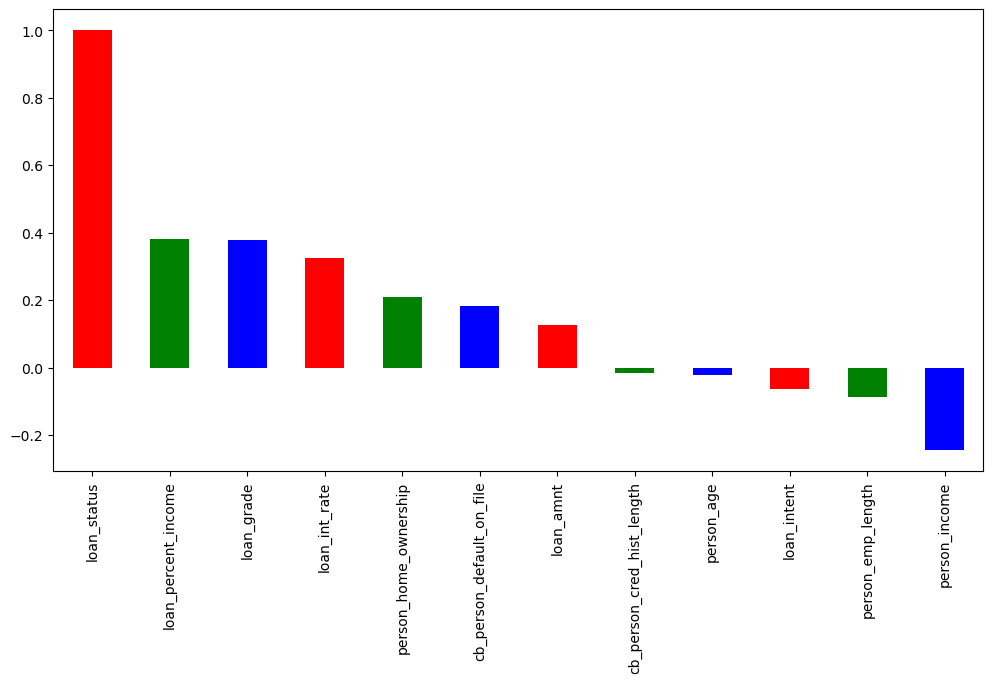

In [37]:
# Visualisasi menggunakan grafik batang
plt.figure(figsize=(12,6))
data.corr()['loan_status'].sort_values(ascending = False).plot(kind='bar', color=['red', 'green', 'blue'])

# VISUALISASI DATA

# 1. DISTRIBUSI DATA LOAN STATUS (STATUS PINJAMAN)- CLASS/OUTPUT

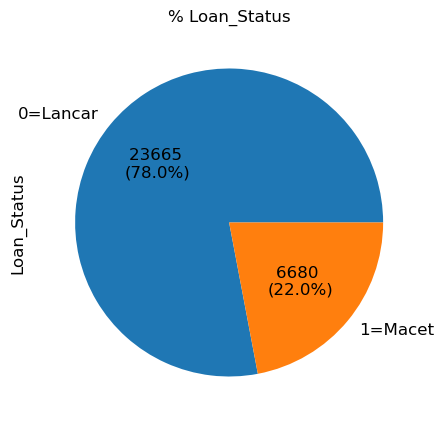

In [38]:
# Fungsi untuk menampilkan jumlah dan persentase  
def func(pct, allvalues):  
    absolute = int(np.round(pct / 100. * sum(allvalues)))  # Menghitung jumlah data  
    return f'{absolute} \n({pct:.1f}%)'  # Format tampilan  

# Hitung frekuensi status pinjaman  
loan_counts = data['loan_status'].value_counts()  

# Buat diagram pie  
ax = loan_counts.plot.pie(autopct=lambda pct: func(pct, loan_counts), labels=['0=Lancar', '1=Macet'], figsize=(5, 5), fontsize=12)  

ax.yaxis.set_major_formatter(mtick.PercentFormatter())  
ax.set_ylabel('Loan_Status', fontsize=12)  
ax.set_title('% Loan_Status', fontsize=12)

plt.savefig('./grafik/statuspinjaman.png')
plt.show()  # Tampilkan plot

### Dari total data sebanyak 30345 baris data, terdapat Nasabah/Peminjam dengan status 0=Kredit Lancar sebanyak 23665 baris data/78% dan untuk Nasabah/Peminjam dengan status 1= Kredit Macet sebanyak 6680 baris data/22% 

# 2. Distribusi Data Feature/Input

# a. Distribusi Data Feature/Input Person_Age (Usia Peminjam)

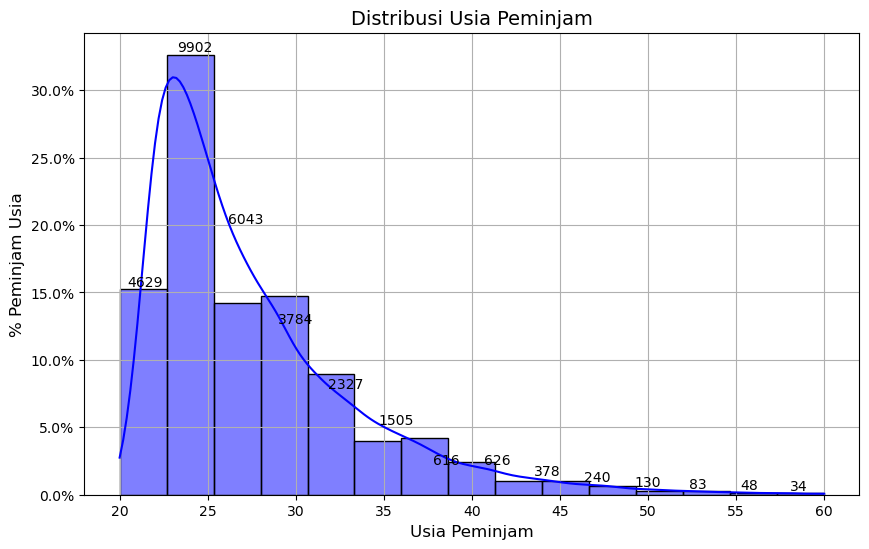

In [39]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.ticker as mtick  
import numpy as np  # Pastikan numpy di-import  

# Mengatur ukuran gambar  
plt.figure(figsize=(10, 6))  

# Menghitung jumlah peminjam untuk histogram  
sns.histplot(data['person_age'], bins=15, kde=True, color='blue', stat="percent")  

# Menambahkan label dan judul  
plt.ylabel('% Peminjam Usia', fontsize=12)  
plt.xlabel('Usia Peminjam', fontsize=12)  
plt.title('Distribusi Usia Peminjam', fontsize=14)  
plt.grid()
# Mengatur format sumbu y  
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  

# Mengumpulkan data plot untuk menambahkan jumlah di atas histogram  
counts, bins = np.histogram(data['person_age'], bins=14)  
bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Menghitung posisi untuk label  

# Menambahkan label jumlah di atas batang  
for count, center in zip(counts, bin_centers):  
    plt.text(x=center, y=count / len(data) * 100,  # Menggunakan persentase untuk posisi  
             s=f'{count}', ha='center', va='bottom', fontsize=10)  

# Tampilkan plot  
plt.savefig('./grafik/usia.png')
plt.show()

### Berdasakan grafik diatas:
1. Histogram menunjukkan bahwa kelompok usia 23-25 tahun memiliki jumlah peminjam tertinggi dengan persentase sekitar 32% atau sebanyak 10,118 peminjam.
2. Terdapat penurunan signifikan dalam jumlah peminjam saat usia bertambah, setiap kelompok usia setelah 25 tahun menunjukkan penurunan yang konsisten.
3. Usia 30 dan 35 tahun juga memiliki angka yang cukup tinggi, tetapi jauh di bawah kelompok usia 25 tahun.
4. Usia 50 dan lebih tinggi (50-60 tahun) menunjukkan penurunan drastis dalam jumlah peminjam, dengan angka di bawah 100, ini menunjukkan bahwa peminjam yang lebih tua (di atas 50 tahun) cenderung lebih sedikit mengambil pinjaman dibandingkan peminjam yang lebih muda.
#### Histogram ini mencerminkan bahwa peminjam cenderung berasal dari usia yang lebih muda, dengan puncak yang signifikan pada usia 25 tahun.
#### Ada kemungkinan bahwa faktor-faktor seperti kebutuhan finansial, stabilitas karir, dan tingkat pendapatan berkontribusi pada pola ini.
#### Data ini menunjukkan bahwa program yang ditujukan untuk peminjam muda mungkin lebih diperlukan, sedangkan strategi yang lebih tepat bisa diterapkan untuk kelompok usia yang lebih tua yang cenderung lebih sedikit terlibat dalam pinjaman.

# Distribusi person_age(Usia Peminjam) terhadap loan_status (Status Pinjaman)

### Pada Grafik diatas mencerminkan pola peminjam berdasarkan usia dan mengungkapkan pentingnya faktor usia dalam status pinjaman. Data ini dapat digunakan oleh lembaga keuangan untuk memahami demografi peminjam dan menyesuaikan produk pinjaman mereka sesuai dengan kebutuhan kelompok umur yang berbeda.
1. Puncak Pemohon di Usia Muda
- Terlihat bahwa jumlah peminjam lebih tinggi di kelompok usia muda, khususnya antara 20 hingga 25 tahun. Ini menunjukkan bahwa usia muda lebih aktif dalam mengajukan pinjaman.
2. Tren Penurunan
- Setelah mencapai puncak pada usia 25-29 tahun, ada tren penurunan yang jelas dalam jumlah peminjam, terutama di usia yang lebih tua.
3. Perbandingan Status Pinjaman
- Batang hijau (disetujui) sering kali lebih dominan dibandingkan batang oranye (ditolak) pada kelompok usia yang lebih muda. 
- Ini mungkin menunjukkan bahwa peminjam muda lebih sering mendapatkan persetujuan dibandingkan dengan peminjam yang lebih tua.

# b. Distribusi Data Feature/Input Person_Income (Pendapatan Peminjam)

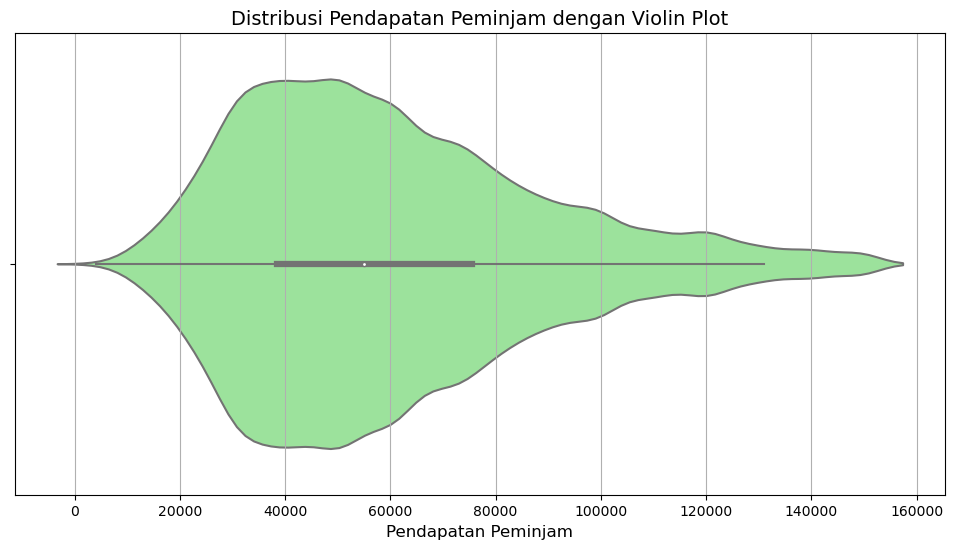

In [41]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Mengatur ukuran gambar  
plt.figure(figsize=(12, 6))  
plt.grid()
# Membuat violin plot untuk distribusi pendapatan  
sns.violinplot(x=data['person_income'], color='lightgreen')  

# Menambahkan label dan judul  
plt.xlabel('Pendapatan Peminjam', fontsize=12)  
plt.title('Distribusi Pendapatan Peminjam dengan Violin Plot', fontsize=14)  

# Tampilkan plot  
plt.savefig('./grafik/income.png')
plt.show()

#### Pada grafik Violin plot mencerminkan distribusi data, di mana bagian yang lebih lebar menunjukkan kepadatan data yang lebih tinggi, puncak kepadatan berada pada rentang nilai pendapatan 40.000-60.0000 USD yang berarti bahwa banyak peminjam memiliki pendapatan di area tersebut.

# Distribusi person_income(Pendapatan Peminjam) terhadap loan_status (Status Pinjaman)

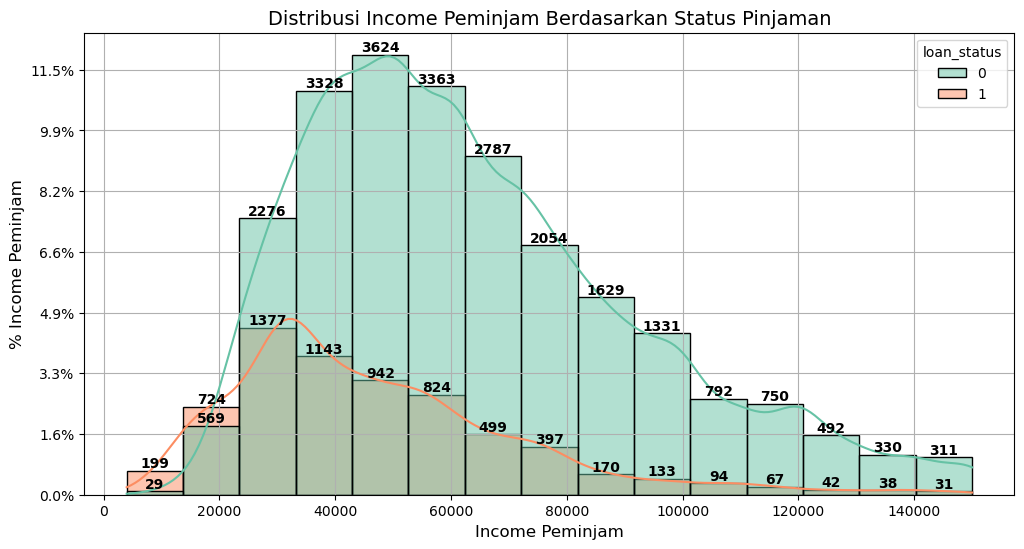

In [42]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.ticker as mtick  

# Mengatur ukuran gambar  
plt.figure(figsize=(12, 6))  

# Menghitung frekuensi total  
total_count = data['person_income'].count()  

# Membuat histogram dengan seaborn  
ax = sns.histplot(data=data, x='person_income', hue='loan_status', bins=15, kde=True, stat="count", palette='Set2')  

# Menambahkan label dan judul  
plt.ylabel('% Income Peminjam', fontsize=12)  
plt.xlabel('Income Peminjam', fontsize=12)  
plt.title('Distribusi Income Peminjam Berdasarkan Status Pinjaman', fontsize=14)  
plt.grid()
# Mengatur format sumbu y untuk persentase  
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))  

# Menambahkan angka di atas setiap batang (jumlah data)  
for p in ax.patches:  
    height = p.get_height()  
    if height > 0:  # Hanya menampilkan label jika ada data  
        ax.annotate(f'{int(height)}',  # Menampilkan jumlah data  
                    (p.get_x() + p.get_width() / 2, height),  # Posisi teks  
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')  

# Menampilkan plot  
plt.savefig('./grafik/income-statuspinjaman.png')
plt.show()

### Interpretasi Data
- Grafik ini membantu dalam memahami bagaimana distribusi income peminjam berkaitan dengan status pinjaman, grafik ini memberikan wawasan yang berguna untuk analisis mengenai pengaruh pendapatan terhadap akses ke pinjaman
- Dapat dilihat bahwa kelompok yang memiliki lebih banyak peminjam pada rentang pendapatan antara 40.000 hingga 60.000.
- rentang nilai pendapatan 42.000-47.000 merupakan kelompok yang paling banyak peminjam dengan 3624 data(12%) memiliki status kredit lancar/lunas dan 942(3%) data memiliki status kredit macet/bermasalah

# c. Distribusi data person_home_ownership (Status Kepemilikan Rumah)

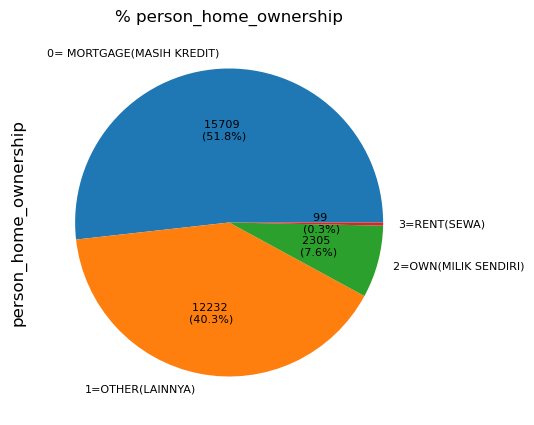

In [43]:
# Fungsi untuk menampilkan jumlah dan persentase  
def func(pct, allvalues):  
    absolute = int(np.round(pct / 100. * sum(allvalues)))  # Menghitung jumlah data  
    return f'{absolute} \n({pct:.1f}%)'  # Format tampilan  

# Hitung frekuensi status pinjaman  
loan_counts = data['person_home_ownership'].value_counts()  

# Buat diagram pie  
ax = loan_counts.plot.pie(autopct=lambda pct: func(pct, loan_counts), 
                          labels=['0= MORTGAGE(MASIH KREDIT)','1=OTHER(LAINNYA)',
                                  '2=OWN(MILIK SENDIRI)','3=RENT(SEWA)'], 
                          figsize=(5, 5), fontsize=8)  

ax.yaxis.set_major_formatter(mtick.PercentFormatter())  
ax.set_ylabel('person_home_ownership', fontsize=12)  
ax.set_title('% person_home_ownership', fontsize=12)  
plt.savefig('./grafik/statusRumah.png')
plt.show()  # Tampilkan plot

# Pada Grafik diatas dapat dijelaskan bahwa:
1. Terdapat 15709 data(51,8%)peminjam/nasabah dengan status kepemilikan rumah MORTGAGE/masih kredit
2. Terdapat 12232 data(40,3%)peminjam/nasabah dengan status kepemilikan rumah OTHER/lainnya seperti (milik keluarga,dll)
3. Terdapat 2305 data(7,6%)peminjam/nasabah dengan status kepemilikan rumah OWN/milik sendiri
4. Terdapat 99 data(0,3%)peminjam/nasabah dengan status kepemilikan rumah RENT/sewa

# Distribusi person_home_ownership(kepemilikan rumah Peminjam) terhadap loan_status (Status Pinjaman)

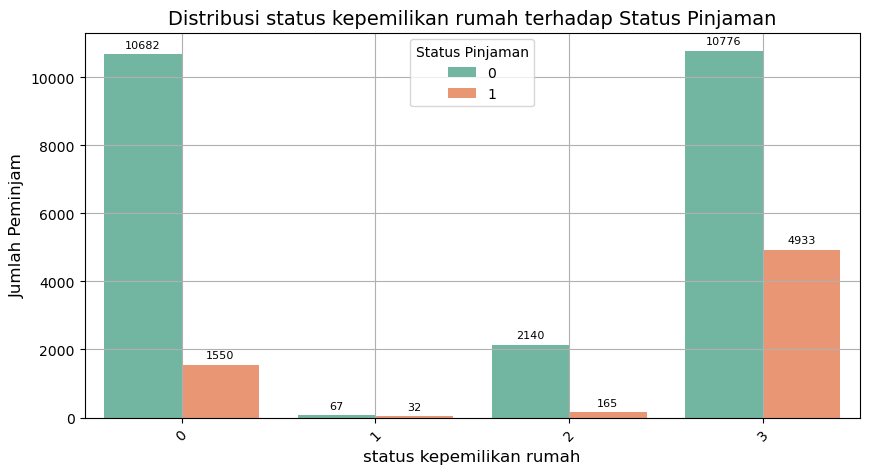

In [44]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='person_home_ownership', hue='loan_status', palette='Set2')

# Menambahkan label jumlah data pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=3)

plt.ylabel('Jumlah Peminjam', fontsize=12)
plt.xlabel('status kepemilikan rumah', fontsize=12)
plt.title('Distribusi status kepemilikan rumah terhadap Status Pinjaman', fontsize=14)

plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Status Pinjaman')
plt.savefig('./grafik/statusRumah-statuspinjaman.png')
plt.show()


# Pada Grafik diatas dapat dijelaskan bahwa:
1. Dari 15709 datapeminjam/nasabah dengan status kepemilikan rumah MORTGAGE/masih kredit, sebanyak 10682 memiliki status kredit lancar dan sebanyak 1550 memiliki status kredit macet
2. Dari 12232 data(40,3%)peminjam/nasabah dengan status kepemilikan rumah OTHER/lainnya seperti (milik keluarga,dll), sebanyak 10776 memiliki status kredit lancar dan sebanyak 4933 memiliki status kredit macet
3. Dari 2305 data(7,6%)peminjam/nasabah dengan status kepemilikan rumah OWN/milik sendiri, sebanyak 2140 memiliki status kredit lancar dan sebanyak 165 memiliki status kredit macet
4. Dari 99 data(0,3%)peminjam/nasabah dengan status kepemilikan rumah RENT/sewa, sebanyak 67 memiliki status kredit lancar dan sebanyak 32 memiliki status kredit macet

# d. Distribusi person_emp_length (Lama Bekerja Pemohon)

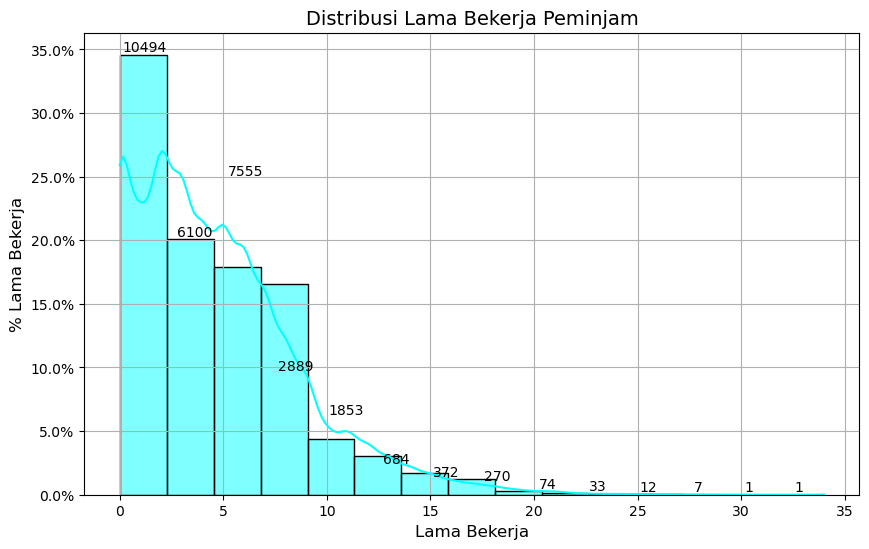

In [45]:
# Mengatur ukuran gambar  
plt.figure(figsize=(10, 6))  

# Menghitung jumlah peminjam untuk histogram  
sns.histplot(data['person_emp_length'], bins=15, kde=True, color='cyan', stat="percent")  

# Menambahkan label dan judul  
plt.ylabel('% Lama Bekerja', fontsize=12)  
plt.xlabel('Lama Bekerja', fontsize=12)  
plt.title('Distribusi Lama Bekerja Peminjam', fontsize=14)  
plt.grid()
# Mengatur format sumbu y  
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  

# Mengumpulkan data plot untuk menambahkan jumlah di atas histogram  
counts, bins = np.histogram(data['person_emp_length'], bins=14)  
bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Menghitung posisi untuk label  

# Menambahkan label jumlah di atas batang  
for count, center in zip(counts, bin_centers):  
    plt.text(x=center, y=count / len(data) * 100,  # Menggunakan persentase untuk posisi  
             s=f'{count}', ha='center', va='bottom', fontsize=10)  
plt.savefig('./grafik/lamakerja.png')
# Tampilkan plot  
plt.show()

### Berdasakan grafik diatas:
1. Histogram menunjukkan bahwa kelompok lama bekerja 0-3 tahun memiliki jumlah peminjam tertinggi dengan persentase sekitar 34,5% atau sebanyak 10.494 peminjam.
2. Terdapat penurunan signifikan dalam jumlah peminjam saat lama bekerja semakin lama, setiap kelompok lama bekerja setelah 0-3 tahun menunjukkan penurunan yang konsisten.
3. lama bekerja 3 sampai dengan 9 tahun juga memiliki angka yang cukup tinggi, tetapi jauh di bawah kelompok lama bekerja 3 tahun.
4. lama bekerja 25 dan lebih tinggi (25-35 tahun) menunjukkan penurunan drastis dalam jumlah peminjam, dengan angka di bawah 15, ini menunjukkan bahwa peminjam yang telah lama bekerja (di atas 25 tahun) cenderung lebih sedikit mengambil pinjaman dibandingkan peminjam yang baru mulai bekerja.
#### Histogram ini mencerminkan bahwa peminjam cenderung berasal dari orang yang belum lama bekerja, dengan puncak yang signifikan pada lama bekerja 0-3 tahun.

# Distribusi person_emp_length(Lama Bekerja Peminjam) terhadap loan_status (Status Pinjaman)

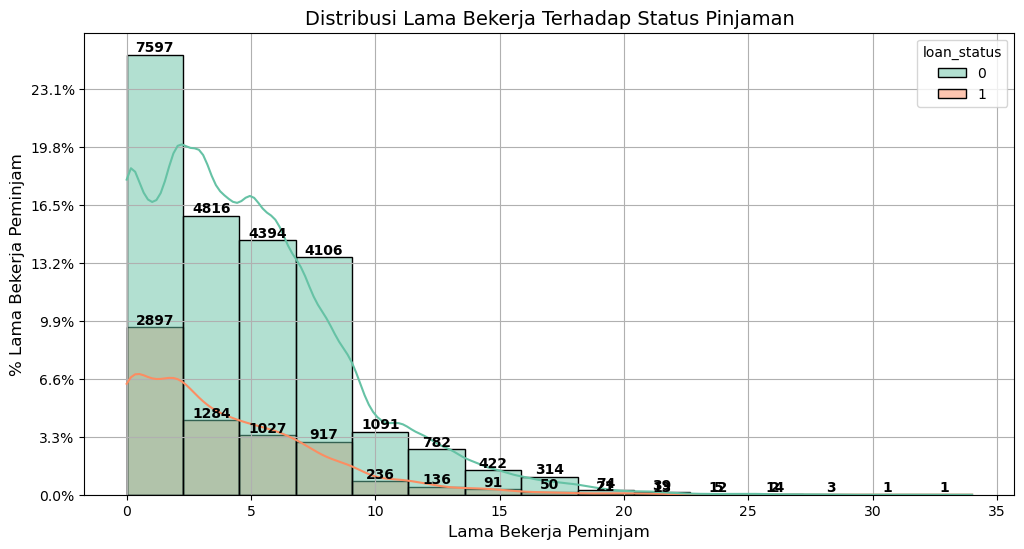

In [46]:
# Mengatur ukuran gambar  
plt.figure(figsize=(12, 6))  

# Menghitung frekuensi total  
total_count = data['person_emp_length'].count()  

# Membuat histogram dengan seaborn  
ax = sns.histplot(data=data, x='person_emp_length', hue='loan_status', bins=15, kde=True, stat="count", palette='Set2')  

# Menambahkan label dan judul  
plt.ylabel('% Lama Bekerja Peminjam', fontsize=12)  
plt.xlabel('Lama Bekerja Peminjam', fontsize=12)  
plt.title('Distribusi Lama Bekerja Terhadap Status Pinjaman', fontsize=14)  
plt.grid()
# Mengatur format sumbu y untuk persentase  
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))  

# Menambahkan angka di atas setiap batang (jumlah data)  
for p in ax.patches:  
    height = p.get_height()  
    if height > 0:  # Hanya menampilkan label jika ada data  
        ax.annotate(f'{int(height)}',  # Menampilkan jumlah data  
                    (p.get_x() + p.get_width() / 2, height),  # Posisi teks  
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')  
plt.savefig('./grafik/lamakerja-statuspinjaman.png')
# Menampilkan plot  
plt.show()

### Interpretasi Distribusi Data Lama Bekerja
- Grafik ini membantu dalam memahami bagaimana distribusi lama bekerja peminjam berkaitan dengan status pinjaman, grafik ini memberikan wawasan yang berguna untuk analisis mengenai pengaruh Lama Bekerja terhadap akses ke pinjaman
- Dapat dilihat bahwa kelompok yang memiliki lebih banyak peminjam pada rentang pendapatan antara 40.000 hingga 60.000.
- rentang nilai lama bekerja 0-3 tahun merupakan kelompok yang paling banyak peminjam dengan 7597 data(25,1%) memiliki status kredit lancar/lunas dan 2897(9,4%) data memiliki status kredit macet/bermasalah

# e.loan_intent (Tujuan Pinjaman)
- Memiliki 32,581 baris data dengan tipe data object (kategorikal).
- Menunjukkan tujuan dari pinjaman (seperti pembiayaan pendidikan, membeli rumah, dsb.)

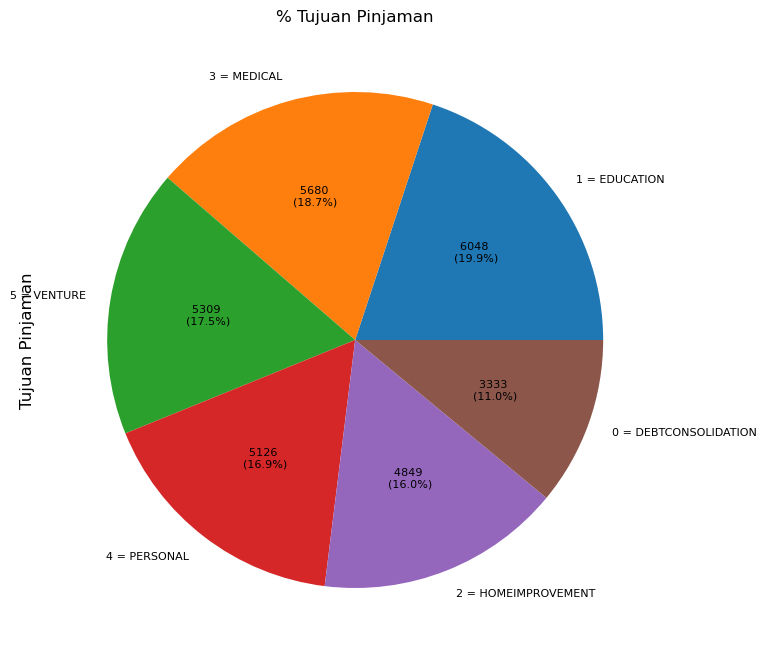

In [47]:
# Fungsi untuk menampilkan jumlah dan persentase  
def func(pct, allvalues):  
    absolute = int(np.round(pct / 100. * sum(allvalues)))  # Menghitung jumlah data  
    return f'{absolute} \n({pct:.1f}%)'  # Format tampilan  

# Hitung frekuensi status pinjaman  
loan_counts = data['loan_intent'].value_counts()  

# Buat diagram pie  
ax = loan_counts.plot.pie(autopct=lambda pct: func(pct, loan_counts), 
                          labels=['1 = EDUCATION','3 = MEDICAL','5 = VENTURE','4 = PERSONAL',
                                  '2 = HOMEIMPROVEMENT','0 = DEBTCONSOLIDATION'],
                          figsize=(8, 16), fontsize=8)  

ax.yaxis.set_major_formatter(mtick.PercentFormatter())  
ax.set_ylabel('Tujuan Pinjaman', fontsize=12)  
ax.set_title('% Tujuan Pinjaman', fontsize=12)  
plt.savefig('./grafik/tujuanpinjaman.png')
plt.show()  # Tampilkan plot

# Pada Grafik diatas dapat dijelaskan bahwa:
1. Terdapat 6048 data(19,9%)peminjam/nasabah dengan tujuan Pinjaman EDUCATION/PENDIDIKAN
2. Terdapat 5680 data(18,7%)peminjam/nasabah dengan tujuan Pinjaman MEDICAL/PENGOBATAN
3. Terdapat 5309 data(17,5%)peminjam/nasabah dengan tujuan pinjaman VENTURE
4. Terdapat 5126 data(16,9%)peminjam/nasabah dengan tujuan pinjaman PERSONAL/KEBUTUHAN PRIBADI
5. Terdapat 4849 data(16%)peminjam/nasabah dengan tujuan pinjaman HOME IMPROVEMENT
6. Terdapat 3333 data(11%)peminjam/nasabah dengan tujuan pinjaman DEBT CONSOLIDATION

# Distribusi loan_intent(tujuan Pinjaman) terhadap loan_status (Status Pinjaman)

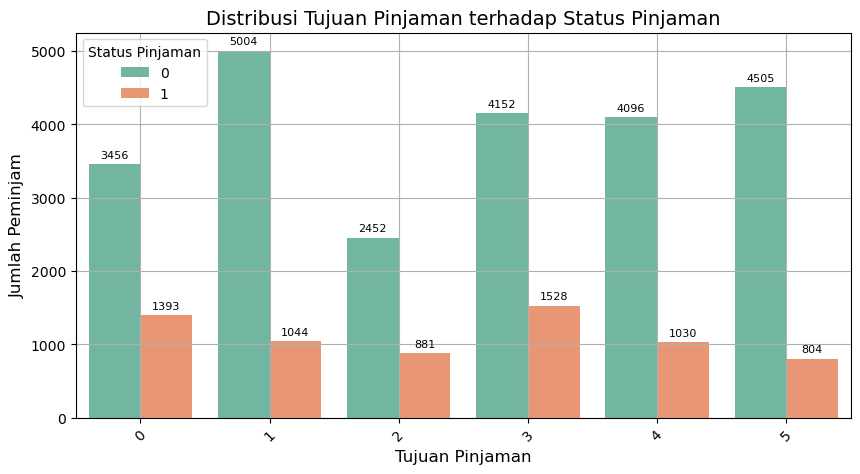

In [48]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='loan_intent', hue='loan_status', palette='Set2')

# Menambahkan label jumlah data pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=3)

plt.ylabel('Jumlah Peminjam', fontsize=12)
plt.xlabel('Tujuan Pinjaman', fontsize=12)
plt.title('Distribusi Tujuan Pinjaman terhadap Status Pinjaman', fontsize=14)

plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Status Pinjaman')
plt.savefig('./grafik/tujuanpinjaman-statuspinjaman.png')
plt.show()


# Pada Grafik diatas dapat dijelaskan bahwa:
1. Terdapat 6048 data(19,9%)peminjam/nasabah dengan tujuan Pinjaman EDUCATION/PENDIDIKAN, 5004 nasabah memiliki status kredit lancar dan 1044 nasabah memiliki status kredit macet
2. Terdapat 5680 data(18,7%)peminjam/nasabah dengan tujuan Pinjaman MEDICAL/PENGOBATAN, 4505 nasabah memiliki status kredit lancar dan 804 nasabah memiliki status kredit macet
3. Terdapat 5309 data(17,5%)peminjam/nasabah dengan tujuan pinjaman VENTURE, 4152 nasabah memiliki status kredit lancar dan 1528 nasabah memiliki status kredit macet
4. Terdapat 5126 data(16,9%)peminjam/nasabah dengan tujuan pinjaman PERSONAL/KEBUTUHAN PRIBADI, 4096 nasabah memiliki status kredit lancar dan 1030 nasabah memiliki status kredit macet
5. Terdapat 4849 data(16%)peminjam/nasabah dengan tujuan pinjaman HOME IMPROVEMENT, 3456 nasabah memiliki status kredit lancar dan 1393 nasabah memiliki status kredit macet
6. Terdapat 3333 data(11%)peminjam/nasabah dengan tujuan pinjaman DEBT CONSOLIDATION, 2452 nasabah memiliki status kredit lancar dan 881 nasabah memiliki status kredit macet

# LANJUTKAN UNtUK VISUALISASI DATA SETIAP KOLOM YANG LAINNYA

# NOTED
#### TAHAP ANALISA DATA BERTUJUAN UNTUK MENGIDENTIFIKASI DAN MENGENALI DATASET TERKAIT DENGAN INFORMASI DETAIL (DIMENSI DATA, STRUKTUR DATA. DLL) PADA KOLOM FEATURE/INPUT DAN JUGA KOLOM CLASS/OUTPUT, SERTA UNTUK MENGETAHUI KORELASI/HUBUNGAN ATAUPUN PENGARUH KOLOM FEATURE/INPUT TERHADAP KOLOM CLASS/OUTPUT
#### TAHAP VISUALISASI DATA BERTUJUAN UNTUK MELAKUKAN VISUALISASI/PENGGAMBARAN DATA DALAM BENTUK VISUAL TERKAIT DENGAN DISTRIBUSI/SEBARAN DATA, SEHINGGA DIDAPATKAN INFORMASI SECARA KOMPEREHENSIP TENTANG DATA
#### TAHAP CLEANING/PEMBERSIHAN DATA BERTUJUAN UNTUK MEMBERSIHKAN DATA DARI DATA YANG BERSIFAT MISSING VALUE (DATA YANG KEHILANGAN NILAI), DATA OUTLIER (DATA TIDAK LAZIM) DAN DATA DUPLIKAT (DATA YANG RANGKAP/GANDA)
#### TAHAP TRANSFORMATION(ENCODING)/PERUBAHAN DATA BERTUJUAN UNTUK MENGUBAH BENTUK DATA YANG BERTIPE OBJECT (KATEGORIKAL) KEDALAM BENTUK NUMERIK SEHINGGA DAPAT MEMUDAHKAN DALAM MEMBANGUN MODEL MESIN LEARNING
## SETELAH SEMUA TAHAP SELESAI DATASET AWAL YANG TELAH DIBERSIHKAN DIBAGI MENJADI 2 BAGIAN
## 1. 25 % DATA EVALUASI (DATA YANG AKAN DIGUNAKAN SEBAGAI DATA BARU UNTUK MELAKUKAN EVALUASI & PENGUJIAN ULANG MODEL MESIN LEARNING)
## 2. 75% DATA LATIH (DATA YANG AKAN DIGUNAKAN UNTUK MEMBANGUN MODEL MESIN LEARNING)

In [49]:
#impor modul
from sklearn.model_selection import train_test_split
# Memecah data menjadi 25% untuk evaluasi dan 75% untuk training dan testing  
data_eval, data_latih= train_test_split(data, test_size=0.75, random_state=42)  
# Menampilkan ukuran masing-masing subset  
print(f'Ukuran Data Evaluasi: {data_eval.shape}')  
print(f'Ukuran Data Training: {data_latih.shape}')

Ukuran Data Evaluasi: (7586, 12)
Ukuran Data Training: (22759, 12)


In [50]:
# menyimpan data
data_eval.to_csv('.\simpandata\data_evaluasi.csv',index=False)
data_latih.to_csv('.\simpandata\data_latih.csv',index=False)